In [68]:
import numpy as np

In [69]:
T=0.5
dt = 0.002
T = np.arange(0,0.5002,0.002)
A0 = 2
f0 = 28
beta = 35
t0 = 0.3
fi0 = 3.14/3
T

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
       0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
       0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
       0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
       0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
       0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212, 0.214,
       0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 , 0.232,
       0.234, 0.236, 0.238, 0.24 , 0.242, 0.244, 0.246, 0.248, 0.25 ,
       0.252, 0.254,

In [70]:
len(T)

251

In [71]:
S = [A0*np.exp(-beta**2*(ti - t0)**2)*np.cos(2*3.14*f0*(ti-t0)+fi0) for ti in T]
S

[3.434883017510345e-49,
 5.28403536075389e-48,
 3.6148945213640986e-47,
 1.919412015434027e-46,
 8.698168883821125e-46,
 3.43960817044236e-45,
 1.169686721490503e-44,
 3.177840754976198e-44,
 4.822539979599788e-44,
 -1.5154141526762655e-43,
 -1.892190742333499e-42,
 -1.158454174248322e-41,
 -5.56669704948774e-41,
 -2.2896633218325197e-40,
 -8.219133215738916e-40,
 -2.5309777730590273e-39,
 -6.168543310602176e-39,
 -7.863971139811863e-39,
 2.952119920844183e-38,
 3.056309762223148e-37,
 1.676867934943933e-36,
 7.29473039856316e-36,
 2.723529081793699e-35,
 8.874199656149843e-35,
 2.473758801580882e-34,
 5.4017380023845735e-34,
 5.690374800751895e-34,
 -2.554222046256564e-33,
 -2.2271236637162586e-32,
 -1.0964075381689555e-31,
 -4.319245203982693e-31,
 -1.4638918085788096e-30,
 -4.329260788654626e-30,
 -1.0920938934443786e-29,
 -2.1335434166809442e-29,
 -1.815602012699419e-29,
 9.85370747188389e-29,
 7.3227940976358065e-28,
 3.238272068020312e-27,
 1.1555738156419873e-26,
 3.555512641245

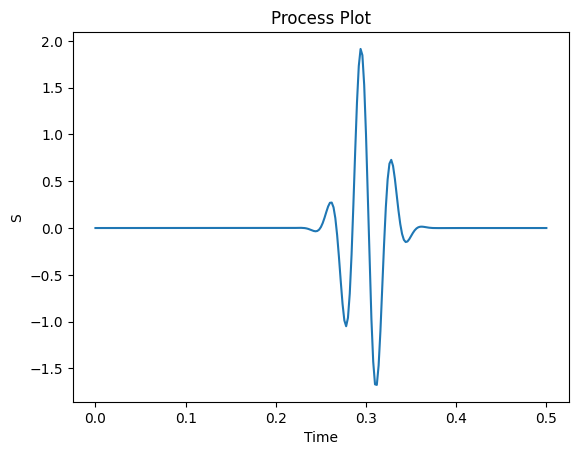

In [72]:
import matplotlib.pyplot as plt
plt.plot(T, S)
plt.xlabel('Time')
plt.ylabel('S')
plt.title('Process Plot')
plt.show()

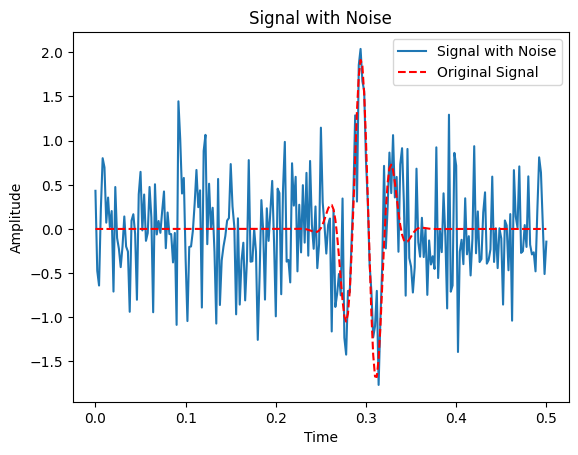

In [73]:
X = [si + 0.5*np.random.randn() for si in S]

plt.plot(T, X, label='Signal with Noise')
plt.plot(T, S, label='Original Signal', linestyle='dashed',color = 'red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with Noise')
plt.legend()
plt.show()

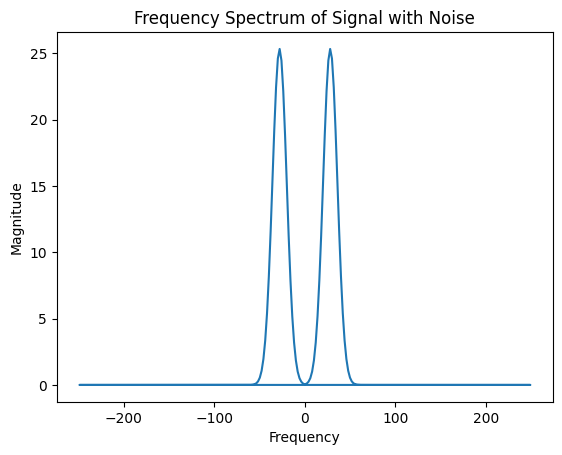

In [74]:
# Compute the FFT
fft_result_S = np.fft.fft(S)
freq = np.fft.fftfreq(len(T), T[1] - T[0])

# Plot the magnitude spectrum
plt.plot(freq, np.abs(fft_result_S))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Signal with Noise')
plt.show()

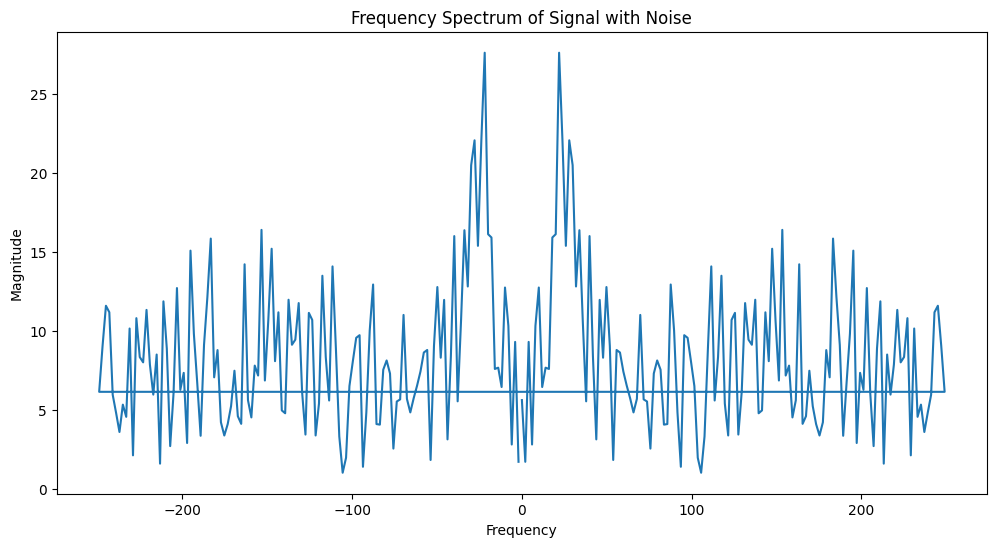

In [75]:
# Compute the FFT
fft_result_X = np.fft.fft(X)
freq = np.fft.fftfreq(len(T), T[1] - T[0])

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plot the magnitude spectrum with ticks every 50 frequency points
plt.plot(freq, np.abs(fft_result_X))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Signal with Noise')
plt.show()

In [82]:
def filter(x, y, f0):
    if(x> f0 or x < -f0):
        return 0
    else:
        return y
    
X_filtred = [filter(freq[i],fft_result_X[i],50) for i in range(len(freq))]
X_filtred

[(-5.622938636308862+8.881784197001252e-16j),
 (0.37194125806251516-1.673079246960369j),
 (2.6864044728041896-8.911093520990415j),
 (-1.0652460198527403+2.5999001819121856j),
 (0.6894814558884157+10.29615312180031j),
 (9.079628585256824-8.953008396321367j),
 (-2.2559867385983456+6.043107133734644j),
 (7.673107113424647+0.1952586968562331j),
 (-4.054472062316983+6.421855242306365j),
 (6.291962696436656-14.622813254099022j),
 (5.9978752734585985+14.971763138211795j),
 (-20.5794914281117-18.4231925053172j),
 (21.88586492992425-2.4481888008794206j),
 (-14.206016952010732+5.920731247978169j),
 (4.40631962532133-21.6297379854854j),
 (-0.9325647717885532+20.48060650563549j),
 (-11.851653218650863-4.879856587672522j),
 (16.35024560643079-0.998419733764246j),
 (-10.18392793954277+3.053857406227377j),
 (-5.409859083021675-1.2106911439230612j),
 (2.9615453385367525+15.732163559600394j),
 (-2.5373815925579946-8.016750450452655j),
 (-0.8050770396549254-3.0286750932131796j),
 (-11.816599430358048+1.

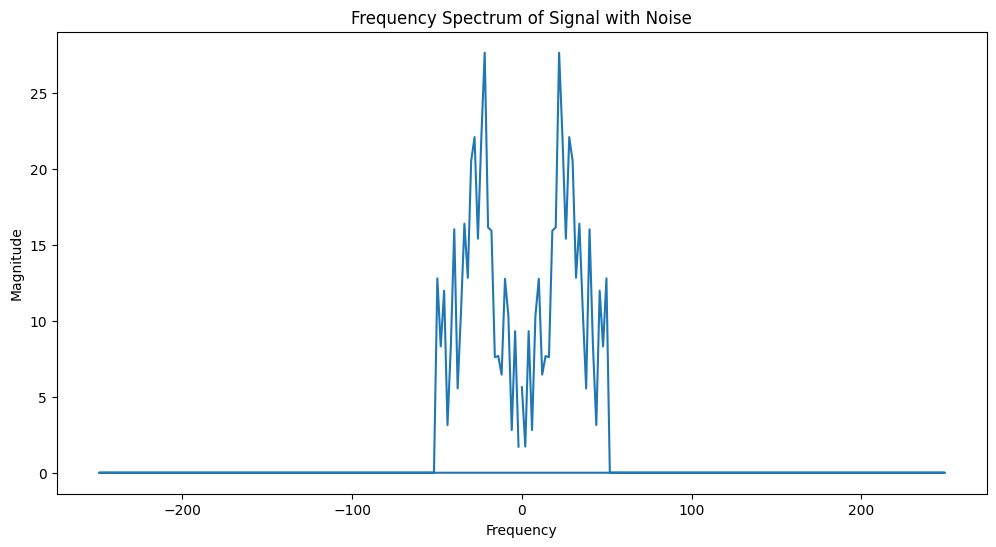

In [88]:

plt.figure(figsize=(12, 6))

plt.plot(freq, np.abs(X_filtred))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Signal with Noise')
plt.show()

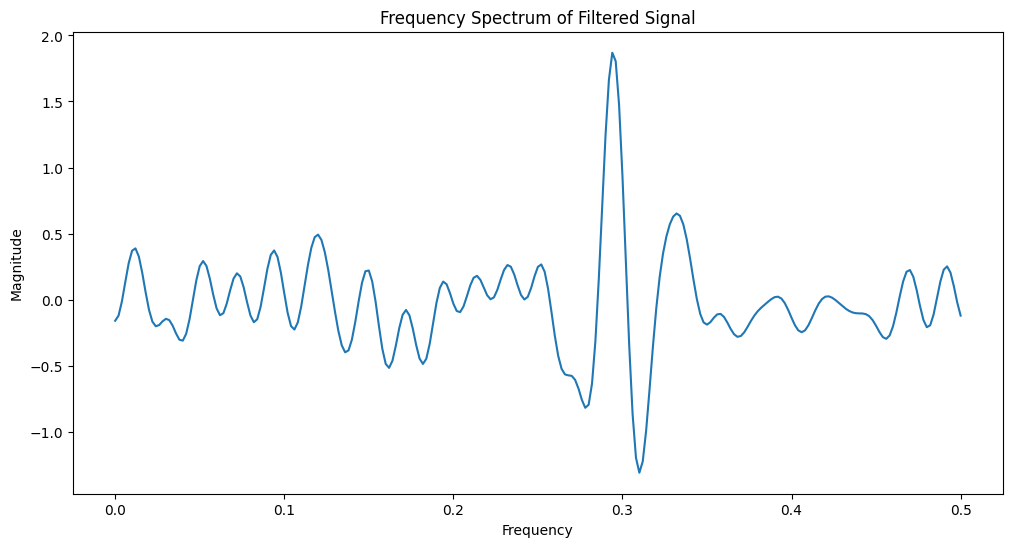

In [84]:
# Perform inverse Fourier transform to get the filtered time-domain signal
x_filtred = np.fft.ifft(X_filtred).real

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plot the magnitude spectrum with ticks every 50 frequency points
plt.plot(T, x_filtred)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Filtered Signal')
plt.show()

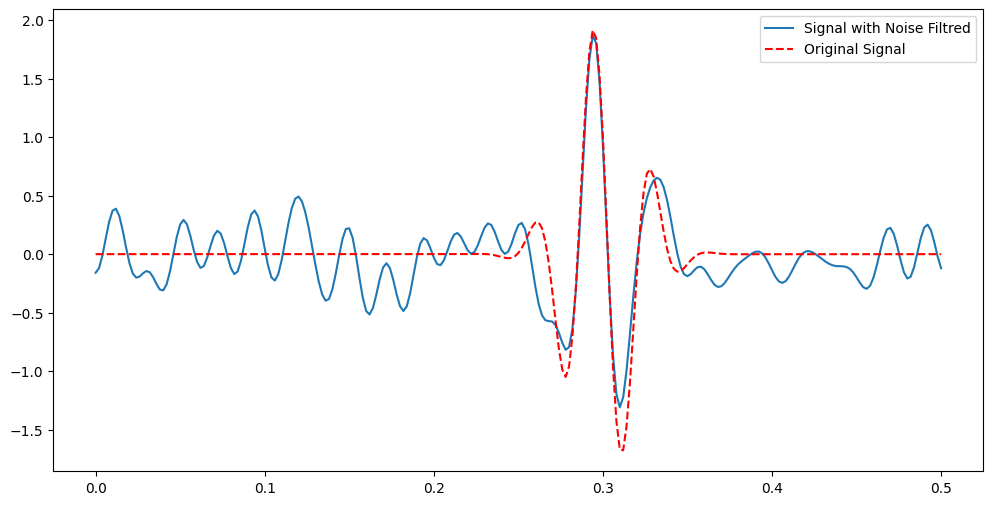

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(T, x_filtred, label='Signal with Noise Filtred')
plt.plot(T, S, label='Original Signal', linestyle='dashed',color = 'red')
plt.legend()
plt.show()

In [2]:
# Данные по среднегодовым запасам
average_stock = [
    2280, 720, 3550, 850, 90, 1580, 220, 16750, 310, 5280,
    8750, 1950, 930, 480, 400, 290, 190, 130, 770, 80,
    250, 800, 30, 170, 3000, 110, 23470, 40, 280, 960,
    20, 70, 370, 13590, 630, 50, 520, 6050, 140, 9870,
    450, 990, 1310, 580, 690, 890, 1700, 60, 7270, 1170
]

# Рассчитываем суммарный запас
total_stock = sum(average_stock)

# Рассчитываем долю каждого товара в общем запасе в процентах
percentages = [(stock / total_stock) * 100 for stock in average_stock]

# Сортируем товары по убыванию доли запаса
sorted_positions = sorted(enumerate(percentages, start=1), key=lambda x: x[1], reverse=True)

# Находим позиции, которые относятся к группе А (70-80%)
cumulative_percentage = 0
group_a_positions = []
for position, percentage in sorted_positions:
    cumulative_percentage += percentage
    group_a_positions.append(position)
    if cumulative_percentage >= 70:
        break

# Выводим результат
group_a_positions


[27, 8, 34, 40, 11, 49, 38]

In [3]:
# Рассчитываем суммарный запас
total_stock = sum(average_stock)

# Рассчитываем долю каждого товара в общем запасе в процентах
percentages = [(stock / total_stock) * 100 for stock in average_stock]

# Сортируем товары по убыванию доли запаса
sorted_positions = sorted(enumerate(percentages, start=1), key=lambda x: x[1], reverse=True)

# Находим позиции, которые относятся к группе А (70-80%)
cumulative_percentage = 0
group_a_positions = []
for position, percentage in sorted_positions:
    cumulative_percentage += percentage
    group_a_positions.append(position)
    if cumulative_percentage > 80:
        break

# Выводим результат
group_a_positions


[27, 8, 34, 40, 11, 49, 38, 10, 3, 25]